In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [7]:
import os 
os.chdir('C:\\Users\\a3011\\바이오의료(세미나)\\Knee_FRCNN\\knee xaray datasets')
os.getcwd()

'C:\\Users\\a3011\\바이오의료(세미나)\\Knee_FRCNN\\knee xaray datasets'

In [10]:
os.listdir()

['.ipynb_checkpoints',
 'annotation_box.csv',
 'X_ray_2020_1.png',
 'X_ray_2020_10.png',
 'X_ray_2020_100.png',
 'X_ray_2020_101.png',
 'X_ray_2020_102.png',
 'X_ray_2020_103.png',
 'X_ray_2020_104.png',
 'X_ray_2020_105.png',
 'X_ray_2020_106.png',
 'X_ray_2020_107.png',
 'X_ray_2020_108.png',
 'X_ray_2020_109.png',
 'X_ray_2020_11.png',
 'X_ray_2020_110.png',
 'X_ray_2020_12.png',
 'X_ray_2020_13.png',
 'X_ray_2020_14.png',
 'X_ray_2020_15.png',
 'X_ray_2020_16.png',
 'X_ray_2020_17.png',
 'X_ray_2020_18.png',
 'X_ray_2020_19.png',
 'X_ray_2020_2.png',
 'X_ray_2020_20.png',
 'X_ray_2020_21.png',
 'X_ray_2020_22.png',
 'X_ray_2020_23.png',
 'X_ray_2020_24.png',
 'X_ray_2020_25.png',
 'X_ray_2020_26.png',
 'X_ray_2020_27.png',
 'X_ray_2020_28.png',
 'X_ray_2020_29.png',
 'X_ray_2020_3.png',
 'X_ray_2020_30.png',
 'X_ray_2020_31.png',
 'X_ray_2020_32.png',
 'X_ray_2020_33.png',
 'X_ray_2020_34.png',
 'X_ray_2020_35.png',
 'X_ray_2020_36.png',
 'X_ray_2020_37.png',
 'X_ray_2020_38.png',


In [8]:
## 경로 설정
images=glob('*.png')
len(images)

110

In [4]:
annotation_box = pd.DataFrame()

for i in images[0:2]:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    cv2.namedWindow("img",2)
    cv2.resizeWindow('img', 600,600)
    
    showCrosshair = False
    fromCenter = False
    rois = cv2.selectROIs('img', img, showCrosshair, fromCenter) # (x 시작 지점, y 시작 지점, x축 드래그 한 길이, y축 드래그 한 길이)
    image_height, image_weight = img.shape
    for r in range(rois.shape[0]):
        xmin = rois[r][0] / image_weight
        xmax = rois[r][2] / image_weight
        ymin = rois[r][1] / image_height
        ymax = rois[r][3] / image_height
        annotation_box = annotation_box.append({'ImageID': i,'LabelName': 'Knee_'+str(r), 'Image_weight': image_weight, 'Image_height': image_height,
                                                'xmin': xmin, 'xmax': xmax, 'ymin': ymin, 'ymax': ymax,
                                                'xmin_raw': rois[r][0], 'xmax_raw': rois[r][2], 'ymin_raw': rois[r][1], 'ymax_raw': rois[r][3]}, ignore_index=True)
    #cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [5]:
annotation_box

,ImageID,Image_height,Image_weight,LabelName,xmax,xmax_raw,xmin,xmin_raw,ymax,ymax_raw,ymin,ymin_raw
0,X_ray_2020_1.png,1994.0,2342.0,Knee_0,0.343296,804.0,0.118275,277.0,0.393681,785.0,0.297894,594.0
1,X_ray_2020_1.png,1994.0,2342.0,Knee_1,0.381725,894.0,0.543126,1272.0,0.409729,817.0,0.316449,631.0
2,X_ray_2020_10.png,2384.0,2558.0,Knee_0,0.336591,861.0,0.083268,213.0,0.408138,973.0,0.364933,870.0
3,X_ray_2020_10.png,2384.0,2558.0,Knee_1,0.353010,903.0,0.576622,1475.0,0.424916,1013.0,0.336409,802.0


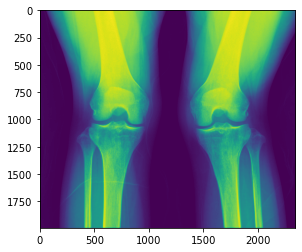

In [19]:
plt.imshow(cv2.imread(images[0], cv2.IMREAD_GRAYSCALE))

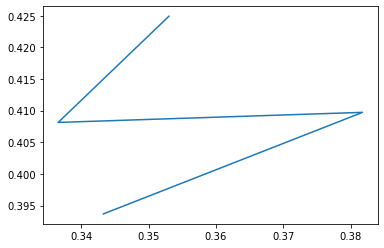

In [15]:
plt.plot(annotation_box['xmax'],annotation_box['ymax'])

TypeError: Image data of dtype <U16 cannot be converted to float

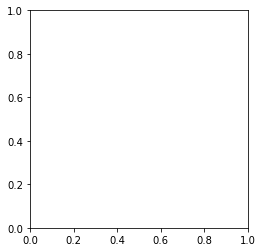

In [6]:
plt.imshow(images[0])

In [9]:
annotation_box

NameError: name 'annotation_box' is not defined

In [12]:
os.getcwd()

'C:\\Users\\a3011\\바이오의료(세미나)\\Knee_FRCNN\\knee xaray datasets'

In [11]:
#annotation_box.to_csv('annotation_box.csv')

NameError: name 'annotation_box' is not defined

In [15]:
annotation_box = pd.read_csv('annotation_box.csv')

In [16]:
annotation_box

,Unnamed: 0,ImageID,Image_height,Image_weight,LabelName,xmax,xmax_raw,xmin,xmin_raw,ymax,ymax_raw,ymin,ymin_raw
0,0,X_ray_2020_1.png,1994.0,2342.0,Knee_0,0.351409,823.0,0.099915,234.0,0.396690,791.0,0.301404,601.0
1,1,X_ray_2020_1.png,1994.0,2342.0,Knee_1,0.370196,867.0,0.543126,1272.0,0.386660,771.0,0.302909,604.0
2,2,X_ray_2020_10.png,2384.0,2558.0,Knee_0,0.326818,836.0,0.093041,238.0,0.364933,870.0,0.368289,878.0
3,3,X_ray_2020_10.png,2384.0,2558.0,Knee_1,0.356529,912.0,0.573104,1466.0,0.401846,958.0,0.339765,810.0
4,4,X_ray_2020_100.png,2262.0,2447.0,Knee_0,0.328157,803.0,0.086637,212.0,0.388594,879.0,0.347922,787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,X_ray_2020_97.png,2344.0,2465.0,Knee_1,0.311562,768.0,0.601623,1483.0,0.405290,950.0,0.379693,890.0
216,216,X_ray_2020_98.png,2492.0,2592.0,Knee_0,0.305170,791.0,0.129630,336.0,0.428571,1068.0,0.354735,884.0
217,217,X_ray_2020_98.png,2492.0,2592.0,Knee_1,0.308256,799.0,0.528164,1369.0,0.441413,1100.0,0.359952,897.0
218,218,X_ray_2020_99.png,1929.0,2382.0,Knee_0,0.326616,778.0,0.166667,397.0,0.483670,933.0,0.322965,623.0


In [17]:
rois = annotation_box[annotation_box['ImageID'] == 'X_ray_2020_1.png'][['Image_height','Image_weight','xmin','xmax','ymin','ymax']].reset_index()

In [18]:
rois

,index,Image_height,Image_weight,xmin,xmax,ymin,ymax
0,0,1994.0,2342.0,0.099915,0.351409,0.301404,0.39669
1,1,1994.0,2342.0,0.543126,0.370196,0.302909,0.38666


In [30]:
for i in [images[3]]:
    img = cv2.imread(i)
    cv2.namedWindow("img",2)
    cv2.resizeWindow('img', 600,600)
    rois = annotation_box[annotation_box['ImageID'] == i][['Image_height','Image_weight','xmin','xmax','ymin','ymax']].reset_index()
    if len(rois) == 0:
        break

    for r in range(len(rois)):
        xmin = rois['xmin'][r] * rois['Image_weight'][r]
        xmax = rois['xmax'][r] * rois['Image_weight'][r]
        ymin = rois['ymin'][r] * rois['Image_height'][r]
        ymax = rois['ymax'][r] * rois['Image_height'][r]
        print(images[0], xmin, xmax, ymin, ymax)
        #print(xmin, xmax, ymin, ymax)
        cv2.rectangle(img, (int(xmin), int(ymax)), (int(xmin+xmax), int(ymin+ymax)), (0,0,255), 5)
    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

X_ray_2020_1.png 435.0 801.0 632.9999999999999 663.0000000000001
X_ray_2020_1.png 1320.0 805.0 639.0 739.0
